In [1]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data

df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# Number of observations
len(df)

200

In [11]:
# Descriptive Statistics
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


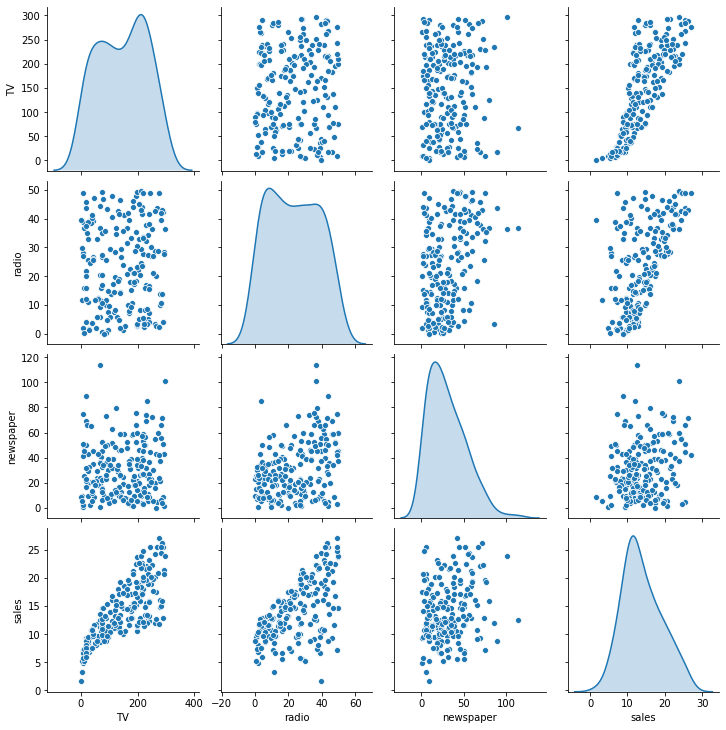

In [14]:
# Correlation Intuition
sns.pairplot(df, diag_kind='kde')

It seems newspaper has the lowest correlation or linear relationship to the sales

In [13]:
# Correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- Correlation between TV spending and sales is quite high (positive)
- Radio spending vs sales has moderate positive correlation

In [107]:
# Defining Variables

X = df.drop(['sales'],axis=1)
y = df['sales']

# Train and Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [22]:
len(X_train)

140

In [21]:
len(X_test)

60

# Creating Model (Estimator/Hypothesis)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [26]:
# Fit model with training data

model.fit(X_train,y_train)

LinearRegression()

# Calculating Performance on Test Set

In [27]:
y_predict = model.predict(X_test)

In [28]:
y_predict

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
# Performance Metrics

MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)

In [32]:
MAE

1.22122993808994

In [33]:
MSE

2.2412862530933477

In [34]:
RMSE

1.497092600039606

In [35]:
# Compared to the sales mean
np.mean(df['sales'])

14.022500000000003

In [42]:
print('Based on MAE, prediction will be shifted around',(MAE/np.mean(df['sales']))*100,'% from mean')

Based on MAE, prediction will be shifted around 8.70907425986764 % from mean


In [43]:
print('Based on RMSE, prediction will be shifted around',(RMSE/np.mean(df['sales']))*100,'% from mean')

Based on RMSE, prediction will be shifted around 10.67636013577897 % from mean


# Checking Residuals

In [79]:
residuals = y_test - y_predict

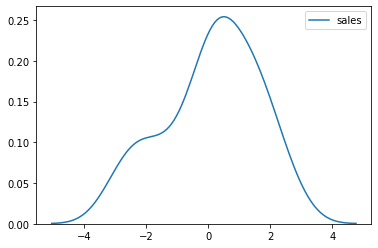

In [45]:
sns.kdeplot(residuals)

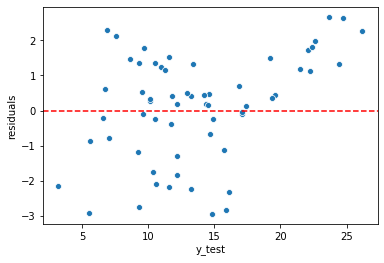

In [49]:
sns.scatterplot(x = y_test, y = residuals)
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

residuals seem quite random, "maybe" linear regression is good or valid model to choose in predicting sales

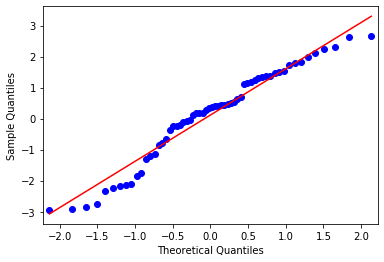

In [52]:
# Normality of residuals

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(residuals, line='s')
pyplot.show()

In [59]:
# Normality Test (Shapiro Wilk)

from scipy.stats import shapiro

stat, pvalue = shapiro(residuals)

print('stat:', stat)
print('pvalue:', pvalue)

stat: 0.9533621668815613
pvalue: 0.02247661165893078


With Alpha 0.05, pvalue < Alpha that means reject H0 or residuals is not normal 

In [60]:
# Beta Coefficients

model.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [63]:
model.intercept_

3.0777744955280415

beta coeff for newspaper seems to small, lets try exclude newspaper from the model

# Excluding Newspaper

In [86]:
X_adj = df[['TV','radio']]
y_adj = df['sales']

In [87]:
X_adj

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [88]:
X_adj_train, X_adj_test, y_adj_train, y_adj_test = train_test_split(X_adj, y_adj, test_size=0.3, random_state=43)

In [89]:
X_adj_train

,TV,radio
71,109.8,14.3
90,134.3,4.9
100,222.4,4.3
44,25.1,25.7
94,107.4,14.0
...,...,...
58,210.8,49.6
21,237.4,5.1
49,66.9,11.7
64,131.1,42.8


In [90]:
model_adj = LinearRegression()

In [91]:
model_adj.fit(X_adj_train,y_adj_train)

LinearRegression()

In [92]:
y_adj_predict = model_adj.predict(X_adj_test)

In [93]:
# Performance Metrics

MAE_adj = mean_absolute_error(y_adj_test,y_adj_predict)
MSE_adj = mean_squared_error(y_adj_test,y_adj_predict)
RMSE_adj = np.sqrt(MSE_adj)

In [94]:
MAE_adj

1.2202594848060524

In [95]:
MSE_adj

2.2349594098614394

In [96]:
RMSE_adj

1.4949780633378669

In [97]:
residuals_adj = y_adj_test - y_adj_predict

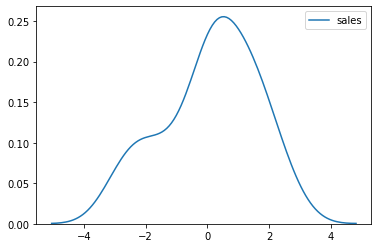

In [98]:
sns.kdeplot(residuals_adj)

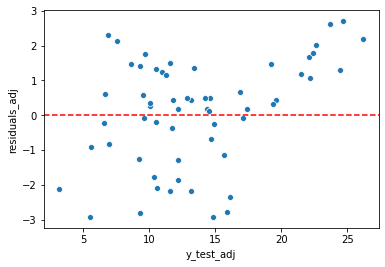

In [99]:
sns.scatterplot(x = y_adj_test, y = residuals_adj)
plt.xlabel('y_test_adj')
plt.ylabel('residuals_adj')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

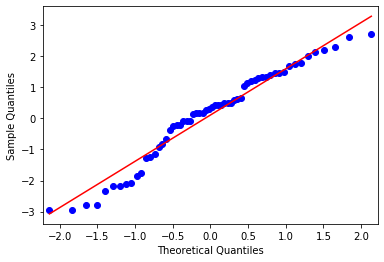

In [100]:
qqplot(residuals_adj, line='s')
pyplot.show()

In [101]:
stat, pvalue = shapiro(residuals_adj)

print('stat:', stat)
print('pvalue:', pvalue)

stat: 0.9540327787399292
pvalue: 0.024198098108172417


In [103]:
model_adj.coef_

array([0.04595565, 0.18011132])

residual is not normal

# Linear Regression with Stats Model

In [105]:
import statsmodels.api as sm

In [108]:
new_model = sm.OLS(y, X)

In [109]:
results = new_model.fit()

In [110]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):                   2.43e-171
Time:                        12:36:53   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

with alpha 0.05, all variables are important